In [1]:
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
def fit_func(x):
    return x**2

def estimate_fit(pop):
    """ Estimate the fit of a population. """
    
    max_fit = max(fit_func(pop))
    min_fit = min(fit_func(pop))
    avg_fit = np.mean(fit_func(pop))
    return max_fit, min_fit, avg_fit

def gen_init_pop(low, high, n_inds):
    """ Generate random uniform distribution for n_inds invididuals as integers. """
    
    out = np.round(np.random.uniform(low, high, n_inds))
    return out.astype('int32')

def crossover(pop):
    """ Select two individuals for crossover based on their fitness through roulette-wheel selection. """
    
    p = np.zeros(pop.size) # probability density
    # compute crossover probability
    for i, ind in enumerate(pop):
        p_i = fit_func(ind) / np.sum(fit_func(pop))
        p[i] = p_i
    
    # parent selection
    parents = np.random.choice(pop, pop.size, p=p)
    
    # random parent matching
    combs = list(combinations(parents, 2))
    pairs = list()
    n_parents = int(pop.size / 2)

    count = 0
    for i in combs:
        if i[0] != i[1] and not i in pairs: # if parents are not the same and if pair is not a duplicate
            pairs.append(i)
            count += 1
        if count == n_parents:
            break
    
    return p, parents, pairs

def stats_crossover(pop, n_sims=10000):
    """ Generate histogram of counts as a sanity check. For a large number of simulations, the probability of 
    counts should be equal to the crossover probability. """
    
    count = np.zeros(n_sims * pop.size)
    start = 0
    for i_sim in range(n_sims):
        end = start + pop.size
        
        p, pop, parents, _ = crossover(pop)
        count[start:end] = parents
        start = end
        
    unique, counts = np.unique(count, return_counts=True)
    return unique, counts

def flip_bit(bit):
    if bit == '1':
        return '0'
    else: # bit == 0
        return '1'
    
def binarystr_to_int(binary):
    return int(''.join(binary), 2)
    
def mutation(offspring, mutation_rate):
    """ Create mutation by bit-flipping according to a small probability. """
    for i, bit in enumerate(offspring):
        if np.random.uniform(0, 1) < mutation_rate:
            offspring[i] = flip_bit(bit)
    return offspring

def create_offsprings(parents, pairs, bit_width=5, mutation_rate=0.1):
    """ Create two offsprings for each pair by randomly choosing a crossover point and mutation according to a small
    probability. """ 
    
    new_offspring = list()
    for parents in pairs:
        # int to bits
        bin_par1 = np.binary_repr(parents[0], bit_width)
        bin_par2 = np.binary_repr(parents[1], bit_width)
        
        # create offsprings
        cross_point = int(np.round(np.random.uniform(0, bit_width-1)))
        off1 = list(bin_par1[0:cross_point] + bin_par2[cross_point:])
        off2 = list(bin_par2[0:cross_point] + bin_par1[cross_point:])
        
        # create mutations
        off1 = mutation(off1, mutation_rate)
        off2 = mutation(off2, mutation_rate)
        
        # bits to int
        off1 = binarystr_to_int(off1)
        off2 = binarystr_to_int(off2)
        
        new_offspring.append(off1)
        new_offspring.append(off2)
    return np.array(new_offspring, dtype='int32')

In [3]:
# initialization
bit_bit_width = 5
size_pop = 10
init_pop = gen_init_pop(0, 31, size_pop)

n_iterations = 100
max_fit = np.zeros(n_iterations)
min_fit = np.zeros(n_iterations)
avg_fit = np.zeros(n_iterations)

new_offspring = init_pop
for i in range(n_iterations):
    # estimation of fit
    max_fit[i], min_fit[i], avg_fit[i] = estimate_fit(new_offspring)
    
    # run algorithm
    p, parents, pairs = crossover(init_pop)
    new_offspring = create_offsprings(parents, pairs)

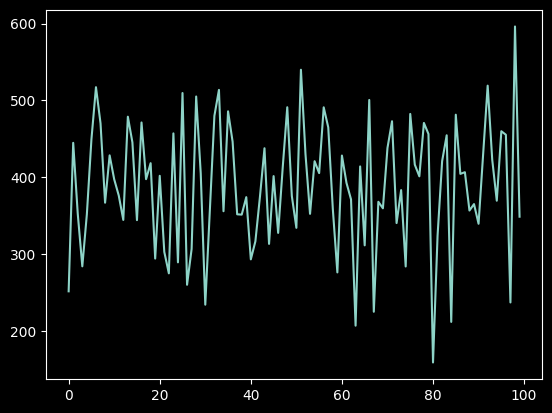

In [4]:
plt.plot(avg_fit)
plt.show()